build ML models based on ensemble learning techniques like, voting classification , bagging, random forest classification

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df1=pd.read_csv("/content/loan_dataset.csv")


In [4]:
df1

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0


In [ ]:
df1.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
42031,301545288710,X,"Miller, Mcclure and Allen",4.375,127000,360,2012-02-01,04/2012,80,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42032,536320111729,X,OTHER,3.875,404000,360,2012-03-01,05/2012,59,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42033,356043694726,X,Browning-Hart,3.875,263000,360,2012-01-01,03/2012,44,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42034,194097698337,X,OTHER,4.125,74000,360,2012-01-01,03/2012,55,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42035,894337998887,Y,Browning-Hart,3.375,452000,180,2012-02-01,03/2012,80,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,4.203600e+04,42036.000000,42036.000000,42036.000000,42036.000000,42036.000000,42036.000000,42035.000000,42035.000000,42035.000000,...,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000,42035.000000
mean,5.489011e+11,3.872175,208781.544391,292.513298,67.342968,1.589542,30.829384,769.333151,2.763935,456.701439,...,0.003806,0.005995,0.006614,0.008136,0.009563,0.011419,0.013679,0.015654,0.019365,0.015130
std,2.594756e+11,0.462498,114766.251436,89.715079,17.305923,0.491923,9.726680,42.557716,8.063763,382.424614,...,0.082974,0.111063,0.130711,0.151535,0.171350,0.196953,0.228106,0.255020,0.288321,0.122072
min,1.000009e+11,2.375000,14000.000000,71.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.249214e+11,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,750.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.470725e+11,3.875000,184000.000000,360.000000,72.000000,2.000000,31.000000,781.000000,0.000000,738.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.735241e+11,4.125000,280000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.998941e+11,6.625000,968000.000000,360.000000,97.000000,2.000000,61.000000,840.000000,35.000000,834.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [ ]:
df1.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [ ]:
df1.shape

(42036, 29)

In [ ]:
df1.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         1
dtype: int64

In [15]:
data = df1.dropna()

In [ ]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

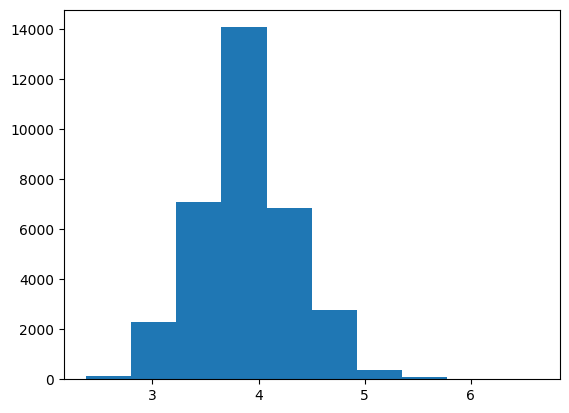

In [ ]:
plt.hist(df1['interest_rate'])
plt.show()

In [ ]:
df1.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [ ]:
df1['source'].value_counts()

X    18462
Y    10902
Z     4259
Name: source, dtype: int64

In [ ]:
data['financial_institution'].nunique()

19

In [ ]:
data['financial_institution'].value_counts(normalize = True) * 100

OTHER                          42.858842
Browning-Hart                  27.291654
Swanson, Newton and Miller      5.945512
Edwards-Hoffman                 4.190708
Martinez, Duffy and Bird        4.047945
Miller, Mcclure and Allen       2.852299
Nicholson Group                 1.855928
Suarez Inc                      1.543632
Turner, Baldwin and Rhodes      1.513890
Cole, Brooks and Vincent        1.388972
Richards-Walters                1.255131
Taylor, Hunt and Rodriguez      1.171852
Sanchez-Robinson                0.990423
Sanchez, Hays and Wilkerson     0.734638
Romero, Woods and Johnson       0.687050
Thornton-Davis                  0.600797
Anderson-Taylor                 0.398549
Richardson Ltd                  0.359883
Chapman-Mcmahon                 0.312296
Name: financial_institution, dtype: float64

In [ ]:
df1['interest_rate'].describe()

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

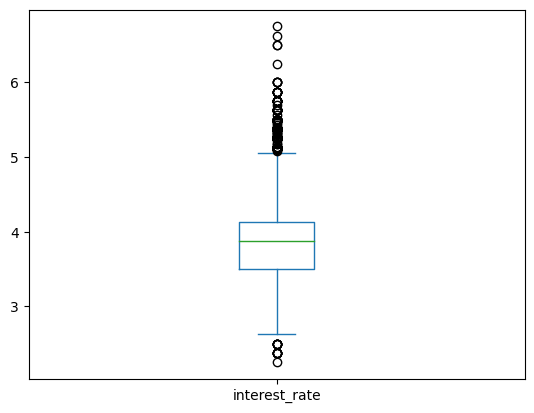

In [ ]:
df1['interest_rate'].plot(kind="box")
plt.show()

In [ ]:
df1['unpaid_principal_bal'].describe().round()

count     116058.0
mean      208226.0
std       114685.0
min        11000.0
25%       120000.0
50%       183000.0
75%       278000.0
max      1200000.0
Name: unpaid_principal_bal, dtype: float64

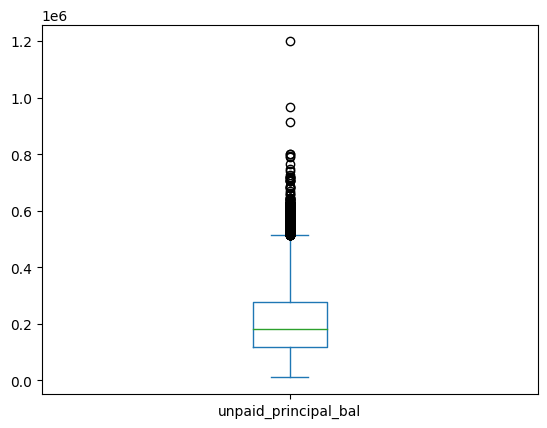

In [ ]:
df1['unpaid_principal_bal'].plot(kind="box")
plt.show()

In [ ]:
df1[df1['unpaid_principal_bal']>1000000]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
84135,995271859875,Z,Nicholson Group,3.625,1200000,180,2012-01-01,03/2012,49,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['loan_term'].describe()

count    33622.000000
mean       292.555380
std         89.682097
min         71.000000
25%        180.000000
50%        360.000000
75%        360.000000
max        360.000000
Name: loan_term, dtype: float64

In [ ]:
data['loan_to_value'].describe()

count    33622.000000
mean        67.370561
std         17.311844
min          6.000000
25%         57.000000
50%         72.000000
75%         80.000000
max         97.000000
Name: loan_to_value, dtype: float64

<Axes: >

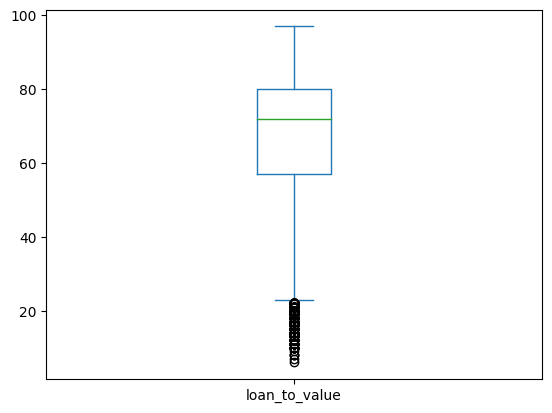

In [ ]:
data['loan_to_value'].plot(kind="box")

In [ ]:
data[data['loan_to_value'] < 7]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
3809,778482838695,X,OTHER,4.375,100000,360,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
data['debt_to_income_ratio'].describe()

count    33622.000000
mean        30.867379
std          9.733503
min          1.000000
25%         23.000000
50%         31.000000
75%         39.000000
max         61.000000
Name: debt_to_income_ratio, dtype: float64

In [ ]:
data['borrower_credit_score'].describe()


count    33622.000000
mean       769.137648
std         42.697620
min          0.000000
25%        749.000000
50%        781.000000
75%        799.000000
max        840.000000
Name: borrower_credit_score, dtype: float64

<Axes: >

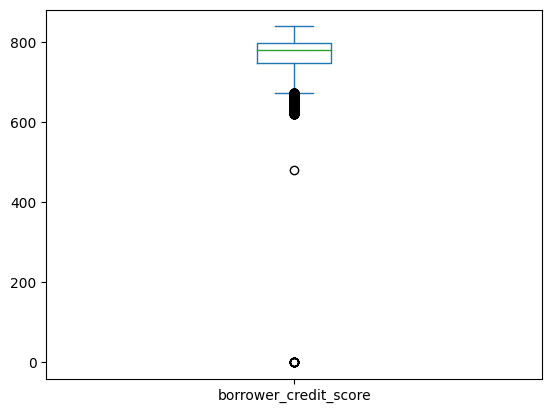

In [ ]:
data['borrower_credit_score'].plot(kind = "box")

In [16]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [17]:
repay_cols = ['m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [18]:
zero_credit_index = data[data['borrower_credit_score'] < 400][repay_cols].index

In [19]:
data = data.drop(zero_credit_index)

In [20]:
data.shape

(116007, 29)

In [21]:
data['loan_purpose'].value_counts(normalize = True) * 100

A23    50.391787
B12    25.327782
C86    24.280431
Name: loan_purpose, dtype: float64

In [22]:
data['co-borrower_credit_score'].describe()

count    116007.000000
mean        459.717431
std         381.931172
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

In [23]:
data['insurance_type'].value_counts()

0.0    115629
1.0       378
Name: insurance_type, dtype: int64

In [ ]:
#### missing value and outliers is done

In [24]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [25]:
req_cols = ['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [26]:
x = data[req_cols]

In [27]:
y = data['m13']

In [28]:
y.value_counts(normalize = True) * 100

0    99.451757
1     0.548243
Name: m13, dtype: float64

In [29]:
x.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12'],
      dtype='object')

In [30]:
x.shape

(116007, 25)

In [31]:
x = pd.get_dummies(x)

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116007 entries, 0 to 116057
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   interest_rate                                      116007 non-null  float64
 1   unpaid_principal_bal                               116007 non-null  int64  
 2   loan_term                                          116007 non-null  int64  
 3   loan_to_value                                      116007 non-null  int64  
 4   number_of_borrowers                                116007 non-null  float64
 5   debt_to_income_ratio                               116007 non-null  float64
 6   borrower_credit_score                              116007 non-null  float64
 7   insurance_percent                                  116007 non-null  float64
 8   co-borrower_credit_score                           116007 non-null  float6

In [33]:
x.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
count,116007.000000,1.160070e+05,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,...,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000,116007.000000
mean,3.868911,2.082340e+05,292.270363,67.429155,1.593257,30.744696,770.265260,2.786306,459.717431,0.003258,...,0.007353,0.010284,0.015430,0.059255,0.010853,0.005612,0.015913,0.503918,0.253278,0.242804
std,0.460991,1.146914e+05,89.765473,17.293610,0.491228,9.729681,39.010306,8.096345,381.931172,0.056990,...,0.085434,0.100887,0.123256,0.236102,0.103610,0.074701,0.125139,0.499987,0.434891,0.428780
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
x["total_credit_score"] = x['borrower_credit_score'] + x['co-borrower_credit_score']

In [35]:
x = x.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1)

In [36]:
repay_cols = ['m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [37]:
x["m_mean"] = x[repay_cols].mean(axis=1)

In [38]:
x[repay_cols].loc[3,repay_cols].kurt()


-1.6500000000000004

In [39]:
x["m_median"] = x[repay_cols].median(axis=1)

In [40]:
x["m_std"] = x[repay_cols].std(axis=1)

In [41]:
x["m_skew"] = x[repay_cols].skew(axis=1)

In [42]:
x["m_kurt"] = x[repay_cols].kurt(axis=1)

In [43]:
x.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
y.value_counts(normalize = True)


0    0.994518
1    0.005482
Name: m13, dtype: float64

In [46]:
y.value_counts()

0    115371
1       636
Name: m13, dtype: int64

In [ ]:
######ensemble learning techniques

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                    random_state = 345, 
                                                     stratify= y )

In [49]:
sc = MinMaxScaler()

In [50]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#### voting classifier-LogisticRegression,DesicionTree,KNN

In [ ]:
###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(max_iter = 5000)

In [ ]:
lg.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score

In [ ]:
f1_score(y_test, y_pred)

0.5592417061611373

In [ ]:
pd.Series(y_test).value_counts()

0.0    6595
1.0     127
Name: m13, dtype: int64

In [ ]:
confusion_matrix(y_test, y_pred)

array([[6570,   25],
       [  68,   59]])

In [ ]:
recall_score(y_test, y_pred)

0.4645669291338583

In [ ]:
####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
f1_score(y_test, y_pred)

0.13235294117647056

In [ ]:
confusion_matrix(y_test, y_pred)

array([[6595,    0],
       [ 118,    9]])

In [ ]:
recall_score(y_test, y_pred)

0.07086614173228346

In [ ]:
####DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth= 8)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
y_pred = dt.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)

In [ ]:
print(acc)

0.9822969354358821


In [ ]:
confusion_matrix(y_test, y_pred)

array([[6543,   52],
       [  67,   60]])

In [ ]:
f1_score(y_test, y_pred)

0.502092050209205

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
classifiers=[("Logistics Regression",lg),("K Nearest Neighbours",knn),("Classification",dt)]

In [ ]:
vc=VotingClassifier(estimators=classifiers)

In [ ]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistics Regression',
                              LogisticRegression(max_iter=5000)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('Classification', DecisionTreeClassifier())])

In [ ]:
y_pred = vc.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9857185361499554

In [ ]:
##### bagging classifier


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
bg = BaggingClassifier(estimator = dt, n_estimators= 50)

In [ ]:
bg.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [ ]:
y_pred = bg.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[6554,   41],
       [  63,   64]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9845284141624516

In [61]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_results = cross_val_score(bg, x, y, cv = 5)

In [ ]:
cross_results

array([0.98690866, 0.98750372, 0.98705742, 0.98735495, 0.98765065])

In [ ]:
cross_results.mean()

0.9872950803524911

In [ ]:
###Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier(n_estimators= 150,max_depth=8,max_features=0.8)

In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.8, n_estimators=150)

In [54]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, max_features=0.8, n_estimators=150)>

In [55]:
y_pred=rf.predict(x_test)

In [58]:
acc = accuracy_score(y_test, y_pred)


In [60]:
print(acc)

0.995733126454616


In [62]:
cross_results = cross_val_score(rf, x, y, cv = 5)

In [63]:
cross_results

array([0.99590553, 0.99564693, 0.99556054, 0.99625016, 0.99568984])

In [64]:
cross_results.mean()

0.9958105982289351